In [1]:
# Para hacer un ejemplo de datos faltantes vamos a usar la base de datos de arbolado
import pandas as pd

#arboles = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/arbolado-publico-lineal/arbolado-publico-lineal-2017-2018.csv")
arboles = pd.read_csv("arbolado.csv")

arboles.head()

C:\Users\Ionatan\AppData\Local\Temp\ipykernel_14064\503031836.py:5: DtypeWarning: Columns (2,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  arboles = pd.read_csv("arbolado.csv")


,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol
0,-58.378563,-34.594902,26779,Lineal,1,NaN,Esmeralda,1000.0,1120.0,ESMERALDA 1120,NaN,Tipuana tipu,5.5,Ocupada,Regular,A nivel,88.0,34.0
1,-58.381532,-34.592319,30887,Lineal,1,NaN,Pellegrini Carlos,1300.0,1345.0,"PELLEGRINI, CARLOS 1345",Exacta,Peltophorum dubium,4.5,Ocupada,Regular,Elevada,6.0,5.0
2,-58.379103,-34.591939,30904,Lineal,1,NaN,Arroyo,800.0,848.0,ARROYO 848,Exacta,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel,7.0,6.0
3,-58.380710,-34.591548,31336,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LD,Fraxinus pennsylvanica,NaN,Ocupada,Regular,A nivel,9.0,29.0
4,-58.380710,-34.591548,31337,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LA,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel,13.0,8.0


In [ ]:
arboles.isna().sum()

long                      15342
lat                       15342
nro_registro                  0
tipo_activ                    0
comuna                        0
manzana                  146040
calle_nombre                 93
calle_altura               5503
calle_chapa                6459
direccion_normalizada     14239
ubicacion                  8296
nombre_cientifico             0
ancho_acera                3097
estado_plantera               0
ubicacion_plantera         1404
nivel_plantera             1352
diametro_altura_pecho       286
altura_arbol               4322
dtype: int64

In [ ]:
# Veamos que porcentaje de los datos representa los datos faltantes en cada columna y discutamos criterios para resolver en cada caso.

arboles.isna().sum()/arboles.shape[0]*100

long                      4.144470
lat                       4.144470
nro_registro              0.000000
tipo_activ                0.000000
comuna                    0.000000
manzana                  39.451078
calle_nombre              0.025123
calle_altura              1.486574
calle_chapa               1.744827
direccion_normalizada     3.846507
ubicacion                 2.241072
nombre_cientifico         0.000000
ancho_acera               0.836620
estado_plantera           0.000000
ubicacion_plantera        0.379275
nivel_plantera            0.365228
diametro_altura_pecho     0.077260
altura_arbol              1.167540
dtype: float64

- Long y Lat: Claramente estan vinculados a informacion de otras columnas, como comuna, calle y altura. No tiene sentido reemplazar con datos al azar. 
- manzana: Si dispusieramos de un long y lat quizas de informacion geografica de la ciudad se pueda conseguir la informacion, pero es complicado y ademas parece informacion medio redundante e innecesaria, eliminaria la columna.
- Calle altura y calle chapa, probablemente de pueda extraer una de otra (si no faltan las dos). Sino se podria extrapolar (con herramientas que vamos a ver mas adelante), por ejemplo eligiendo los arboles que estan en la misma calle y viendo por lat y long cuales estan cerca.
- Direccion normalizada se podria regenerar pero no queda claro cuan util es la columna, para una visualizacion puede servir, para analizar datos la sacaria. (ademas mirando se ve que no esta armada siempre igual)
- ubicacion: No esta claro que codifica esta columna, la eliminaria entera
- ancho_acera, podemos ver como es la distribucion y completar o con promedio o con muestras al azar. 
- ubicacion y nivel plantera es categorica por lo que podriamos reemplazar al azar.
- diametro_altura_pecho: eliminaria las entradas porque son muy pocas
- altura_arbol: podriamos hacer algun tipo de extrapolacion a partir de la especie y el diametro_altura_pecho (con herramientas que vamos a ver mas adelante).



In [ ]:
# Veamos algunos ejemplos de los sencillos:

arboles_limpieza = arboles.drop(["manzana","ubicacion"], axis=1)
display (arboles_limpieza.head())

print (arboles_limpieza.isna().sum()/arboles_limpieza.shape[0]*100)
print (f'entradas: {arboles_limpieza.shape[0]}')

,long,lat,nro_registro,tipo_activ,comuna,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol
0,-58.378563,-34.594902,26779,Lineal,1,Esmeralda,1000.0,1120.0,ESMERALDA 1120,Tipuana tipu,5.5,Ocupada,Regular,A nivel,88.0,34.0
1,-58.381532,-34.592319,30887,Lineal,1,Pellegrini Carlos,1300.0,1345.0,"PELLEGRINI, CARLOS 1345",Peltophorum dubium,4.5,Ocupada,Regular,Elevada,6.0,5.0
2,-58.379103,-34.591939,30904,Lineal,1,Arroyo,800.0,848.0,ARROYO 848,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel,7.0,6.0
3,-58.380710,-34.591548,31336,Lineal,1,Arroyo,900.0,932.0,ARROYO 932,Fraxinus pennsylvanica,NaN,Ocupada,Regular,A nivel,9.0,29.0
4,-58.380710,-34.591548,31337,Lineal,1,Arroyo,900.0,932.0,ARROYO 932,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel,13.0,8.0


long                     4.144470
lat                      4.144470
nro_registro             0.000000
tipo_activ               0.000000
comuna                   0.000000
calle_nombre             0.025123
calle_altura             1.486574
calle_chapa              1.744827
direccion_normalizada    3.846507
nombre_cientifico        0.000000
ancho_acera              0.836620
estado_plantera          0.000000
ubicacion_plantera       0.379275
nivel_plantera           0.365228
diametro_altura_pecho    0.077260
altura_arbol             1.167540
dtype: float64
entradas: 370180


In [ ]:
# Vamos a tirar las que no tienen diametro ni calle

arboles_limpieza.dropna(inplace=True, subset=["diametro_altura_pecho","calle_nombre"])
print (arboles_limpieza.isna().sum()/arboles_limpieza.shape[0]*100)
print (f'entradas: {arboles_limpieza.shape[0]}')

long                     4.120865
lat                      4.120865
nro_registro             0.000000
tipo_activ               0.000000
comuna                   0.000000
calle_nombre             0.000000
calle_altura             1.461867
calle_chapa              1.717140
direccion_normalizada    3.822867
nombre_cientifico        0.000000
ancho_acera              0.819089
estado_plantera          0.000000
ubicacion_plantera       0.371551
nivel_plantera           0.357490
diametro_altura_pecho    0.000000
altura_arbol             1.154675
dtype: float64
entradas: 369801


object
long                     4.120865
lat                      4.120865
nro_registro             0.000000
tipo_activ               0.000000
comuna                   0.000000
calle_nombre             0.000000
calle_altura             1.461867
calle_chapa              1.717140
direccion_normalizada    3.822867
nombre_cientifico        0.000000
ancho_acera              0.819089
estado_plantera          0.000000
ubicacion_plantera       0.371551
nivel_plantera           0.357490
diametro_altura_pecho    0.000000
altura_arbol             1.154675
ancho_numerico           0.000000
dtype: float64
entradas: 369801


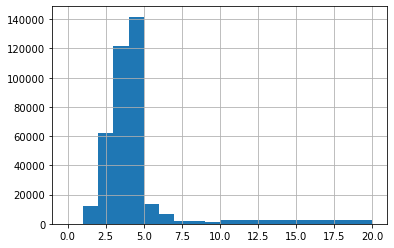

In [ ]:
# Vamos a ver como se comporta el ancho acera

print (arboles_limpieza["ancho_acera"].dtype)
arboles_limpieza['ancho_acera']

arboles_limpieza["ancho_numerico"] = pd.to_numeric(arboles_limpieza["ancho_acera"], errors='coerce')
arboles_limpieza['ancho_numerico']

arboles_limpieza["ancho_numerico"].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,20])

# Vamos a aceptar tomar el valor medio
arboles_limpieza["ancho_numerico"].fillna(arboles_limpieza["ancho_numerico"].mean(), inplace = True)

print (arboles_limpieza.isna().sum()/arboles_limpieza.shape[0]*100)
print (f'entradas: {arboles_limpieza.shape[0]}')

In [ ]:
# Ahora vamos a reemplazar las columnas ubicacion plantera y nivel por valores representativos

display (arboles_limpieza["ubicacion_plantera"].value_counts())


arboles_limpieza["calle_chapa"][arboles_limpieza["ubicacion_plantera"]=="Ochava"].head(20)


Regular                   340135
Ochava                     21858
Fuera de línea              5910
regular                      201
Regular                      198
Ocupada                       40
Fuera Nivel                   36
Cantero Grande                13
O                             12
ochava                        10
Ochava/Fuera Línea             3
Och                            2
Sobreocupada                   2
Elevada                        1
o                              1
Ochva                          1
Subocupada                     1
Fuera Línea,Ochava             1
Fuera de Línea, Ochava         1
Fuera Línea/Ochava             1
Name: ubicacion_plantera, dtype: int64

73     1405.0
180       5.0
189     598.0
287     396.0
367       5.0
580    1000.0
632    1111.0
638     815.0
653    1119.0
671     997.0
682     999.0
687     158.0
701       1.0
712       1.0
835    1409.0
840     222.0
843     222.0
848     897.0
867     807.0
934     373.0
Name: calle_chapa, dtype: object

In [ ]:
# Vamos a reemplazar entonces con valores representativos de la muestra, que no es lo mismo que poner a todos "Regular"

index_nans = arboles_limpieza["ubicacion_plantera"].isna()

# Vamos entonces a reemplazar usando loc
reemplazos = arboles_limpieza["ubicacion_plantera"].dropna().sample(index_nans.sum())
arboles_limpieza["ubicacion_plantera"].loc[arboles_limpieza["ubicacion_plantera"].isna()] = reemplazos.to_list()
display(arboles_limpieza.head(10))

# Una opcion equivalente hubiera sido usar ffill o bfill porque si no hay un orden especial o si los Nans no vienen en bloque estadisticamente es lo mismo
arboles_limpieza["nivel_plantera"].fillna(method="ffill",inplace=True)

print (arboles_limpieza.isna().sum()/arboles_limpieza.shape[0]*100)
print (f'entradas: {arboles_limpieza.shape[0]}')


C:\Users\Ionatan\AppData\Local\Temp\ipykernel_14064\2726896809.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arboles_limpieza["ubicacion_plantera"].loc[arboles_limpieza["ubicacion_plantera"].isna()] = reemplazos.to_list()


,long,lat,nro_registro,tipo_activ,comuna,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol,ancho_numerico
0,-58.378563,-34.594902,26779,Lineal,1,Esmeralda,1000.0,1120.0,ESMERALDA 1120,Tipuana tipu,5.5,Ocupada,Regular,A nivel,88.0,34.0,5.500000
1,-58.381532,-34.592319,30887,Lineal,1,Pellegrini Carlos,1300.0,1345.0,"PELLEGRINI, CARLOS 1345",Peltophorum dubium,4.5,Ocupada,Regular,Elevada,6.0,5.0,4.500000
2,-58.379103,-34.591939,30904,Lineal,1,Arroyo,800.0,848.0,ARROYO 848,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel,7.0,6.0,4.000000
3,-58.380710,-34.591548,31336,Lineal,1,Arroyo,900.0,932.0,ARROYO 932,Fraxinus pennsylvanica,NaN,Ocupada,Regular,A nivel,9.0,29.0,3.785324
4,-58.380710,-34.591548,31337,Lineal,1,Arroyo,900.0,932.0,ARROYO 932,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel,13.0,8.0,3.785324
5,-58.381043,-34.591584,31344,Lineal,1,Arroyo,900.0,970.0,ARROYO 970,Fraxinus pennsylvanica,3.5,Ocupada,Regular,A nivel,29.0,15.0,3.500000
6,-58.380968,-34.591576,31346,Lineal,1,Arroyo,900.0,962.0,ARROYO 962,Fraxinus pennsylvanica,4.5,Ocupada,Regular,A nivel,21.0,12.0,4.500000
7,-58.373356,-34.594871,31864,Lineal,1,Reconquista,1100.0,1126.0,RECONQUISTA 1126,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel,8.0,3.0,3.785324
8,-58.380812,-34.591559,31354,Lineal,1,Arroyo,900.0,940.0,ARROYO 940,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel,38.0,15.0,3.785324
9,-58.379839,-34.592821,32142,Lineal,1,Juncal,800.0,885.0,JUNCAL 885,Tilia x moltkei,2.8,Ocupada,Regular,A nivel,25.0,12.0,2.800000


long                     4.120865
lat                      4.120865
nro_registro             0.000000
tipo_activ               0.000000
comuna                   0.000000
calle_nombre             0.000000
calle_altura             1.461867
calle_chapa              1.717140
direccion_normalizada    3.822867
nombre_cientifico        0.000000
ancho_acera              0.819089
estado_plantera          0.000000
ubicacion_plantera       0.000000
nivel_plantera           0.000000
diametro_altura_pecho    0.000000
altura_arbol             1.154675
ancho_numerico           0.000000
dtype: float64
entradas: 369801


In [ ]:
(arboles_limpieza["calle_chapa"] == "0.0").sum()
(arboles_limpieza["calle_altura"] == "0.0").sum()

import numpy as np


arboles_limpieza["calle_chapa"].replace("0.0", np.NaN, inplace=True)
arboles_limpieza["calle_altura"].replace("0.0", np.NaN, inplace=True)

415

In [ ]:
# Ahora vamos a usar la opcion de usar una serie para reemplazar los nans en altura por chapa y viceversa. Si hay nans en los dos va a seguir siendo nan

arboles_limpieza["calle_altura"].fillna(arboles_limpieza["calle_chapa"],inplace=True)
arboles_limpieza["calle_chapa"].fillna(arboles_limpieza["calle_altura"],inplace=True)

print (arboles_limpieza.isna().sum()/arboles_limpieza.shape[0]*100)
print (f'entradas: {arboles_limpieza.shape[0]}')

In [ ]:
import re

# Ejemplos que vamos a querer usar:

texto = " Rivadavia Av 2345 37" # Queremos extraer secuencias de digitos seguidos.

patron = "\d+"

regex = re.compile(patron, flags = re.IGNORECASE)

if regex.findall(texto):
    print ("encontrado")
else:
    print ("no")

encontrado


In [ ]:
import numpy as np
patron = "\d+"

regex = re.compile(patron, flags = re.IGNORECASE)

direccion_rescatada = arboles_limpieza["direccion_normalizada"].replace(np.NaN,"").apply(lambda x: regex.findall(x)[0] if regex.findall(x) else np.NaN)
direccion_rescatada

0         1120
1         1345
2          848
3          932
4          932
          ... 
370175     NaN
370176     NaN
370177     NaN
370178     NaN
370179     NaN
Name: direccion_normalizada, Length: 369801, dtype: object

In [ ]:
arboles_limpieza

,long,lat,nro_registro,tipo_activ,comuna,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol,ancho_numerico
0,-58.378563,-34.594902,26779,Lineal,1,Esmeralda,1000.0,1120.0,ESMERALDA 1120,Tipuana tipu,5.5,Ocupada,Regular,A nivel,88.0,34.0,5.500000
1,-58.381532,-34.592319,30887,Lineal,1,Pellegrini Carlos,1300.0,1345.0,"PELLEGRINI, CARLOS 1345",Peltophorum dubium,4.5,Ocupada,Regular,Elevada,6.0,5.0,4.500000
2,-58.379103,-34.591939,30904,Lineal,1,Arroyo,800.0,848.0,ARROYO 848,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel,7.0,6.0,4.000000
3,-58.380710,-34.591548,31336,Lineal,1,Arroyo,900.0,932.0,ARROYO 932,Fraxinus pennsylvanica,NaN,Ocupada,Regular,A nivel,9.0,29.0,3.785324
4,-58.380710,-34.591548,31337,Lineal,1,Arroyo,900.0,932.0,ARROYO 932,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel,13.0,8.0,3.785324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370175,NaN,NaN,546140,Lineal,15,Guevara,1000.0,1000.0,NaN,Ceiba speciosa,3.3,Ocupada,Regular,A nivel,34.0,7.0,3.300000
370176,NaN,NaN,546141,Lineal,15,Guevara,1000.0,1000.0,NaN,Melia azedarach,3.3,Ocupada,Regular,A nivel,45.0,8.0,3.300000
370177,NaN,NaN,546142,Lineal,15,Guevara,1000.0,1000.0,NaN,Ceiba speciosa,3.3,Ocupada,Regular,A nivel,60.0,8.0,3.300000
370178,NaN,NaN,546143,Lineal,15,Guevara,1000.0,1000.0,NaN,Ceiba speciosa,3.3,Ocupada,Regular,A nivel,64.0,8.0,3.300000


In [ ]:
patron = "av[^\w]|avenida"

regex = re.compile(patron, flags = re.IGNORECASE)

mascara = arboles_limpieza["calle_nombre"].apply(lambda x: True if regex.findall(x) else False)

arboles_limpieza[mascara]["calle_nombre"].unique()

array([], dtype=object)